In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write


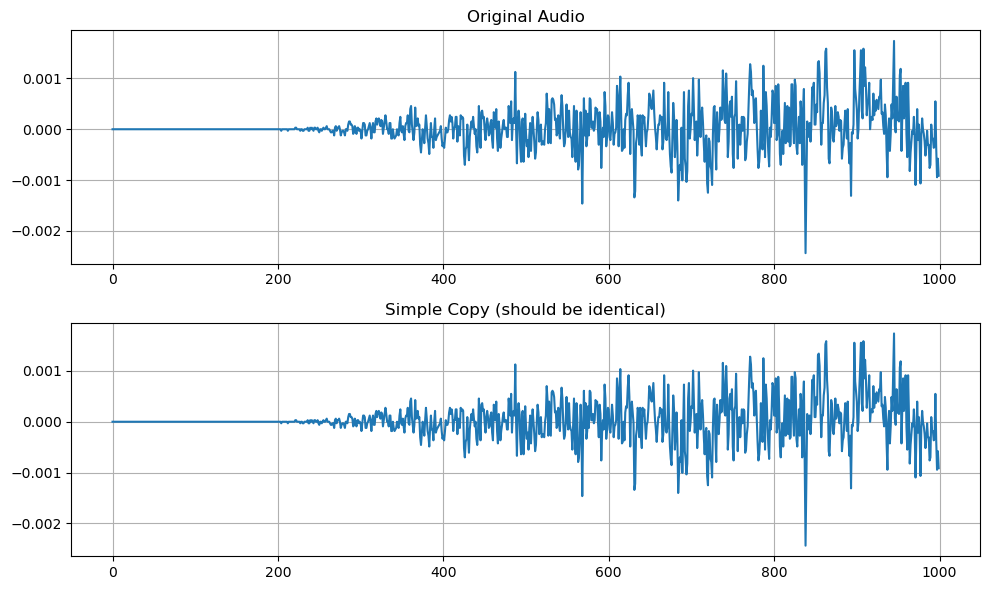

Are the arrays equal? True


In [2]:


# Step 1: Load audio file
input_file = r'C:\Users\ronit\Desktop\Digital Comunication\jm_beat_hip-hop-rnb-01-106355.wav'
sample_rate, audio = read(input_file)

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Ensure it's 16-bit PCM
audio = audio.astype(np.int16)
original_float = audio.astype(np.float32) / 32768.0

# Step 2: Just save the original audio to a new file (no processing)
write('original_copy.wav', sample_rate, audio)

# Step 3: Load the saved file to confirm it works
sample_rate2, audio2 = read('original_copy.wav')
copy_float = audio2.astype(np.float32) / 32768.0

# Step 4: Plot both to compare
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(original_float[:1000])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title("Simple Copy (should be identical)")
plt.plot(copy_float[:1000])
plt.grid(True)

plt.tight_layout()
plt.show()

print("Are the arrays equal?", np.array_equal(audio, audio2))

In [ ]:


# Step 1: Load audio file
input_file = r'C:\Users\ronit\Desktop\Digital Comunication\jm_beat_hip-hop-rnb-01-106355.wav'
sample_rate, audio = read(input_file)

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Ensure it's 16-bit PCM
audio = audio.astype(np.int16)
original_float = audio.astype(np.float32) / 32768.0

# Step 2: Convert to bytes then to bits
audio_bytes = audio.tobytes()
bits = []
for byte in audio_bytes:
    for i in range(8):
        bits.append((byte >> i) & 1)
bits = np.array(bits, dtype=np.uint8)

# Step 3: Convert bits back to bytes then to audio
reconstructed_bytes = bytearray()
for i in range(0, len(bits), 8):
    if i + 8 <= len(bits):
        byte = 0
        for j in range(8):
            byte |= (bits[i + j] << j)
        reconstructed_bytes.append(byte)

reconstructed_audio = np.frombuffer(reconstructed_bytes, dtype=np.int16)

# Make sure lengths match
if len(reconstructed_audio) != len(audio):
    print(f"Length mismatch: Original {len(audio)}, Reconstructed {len(reconstructed_audio)}")
    # Adjust if needed
    if len(reconstructed_audio) > len(audio):
        reconstructed_audio = reconstructed_audio[:len(audio)]
    else:
        reconstructed_audio = np.pad(reconstructed_audio, (0, len(audio) - len(reconstructed_audio)))

reconstructed_float = reconstructed_audio.astype(np.float32) / 32768.0

# Step 4: Save reconstructed audio
write('reconstructed_bits_only.wav', sample_rate, reconstructed_audio)

# Step 5: Plot to compare
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Original Audio")
plt.plot(original_float[:1000])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title("Reconstructed after bit conversion")
plt.plot(reconstructed_float[:1000])
plt.grid(True)

plt.tight_layout()
plt.show()

print("Are the arrays equal?", np.array_equal(audio, reconstructed_audio))

BPSK Signal (first 20 bits): [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Received Bits (first 20 bits after demodulation): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


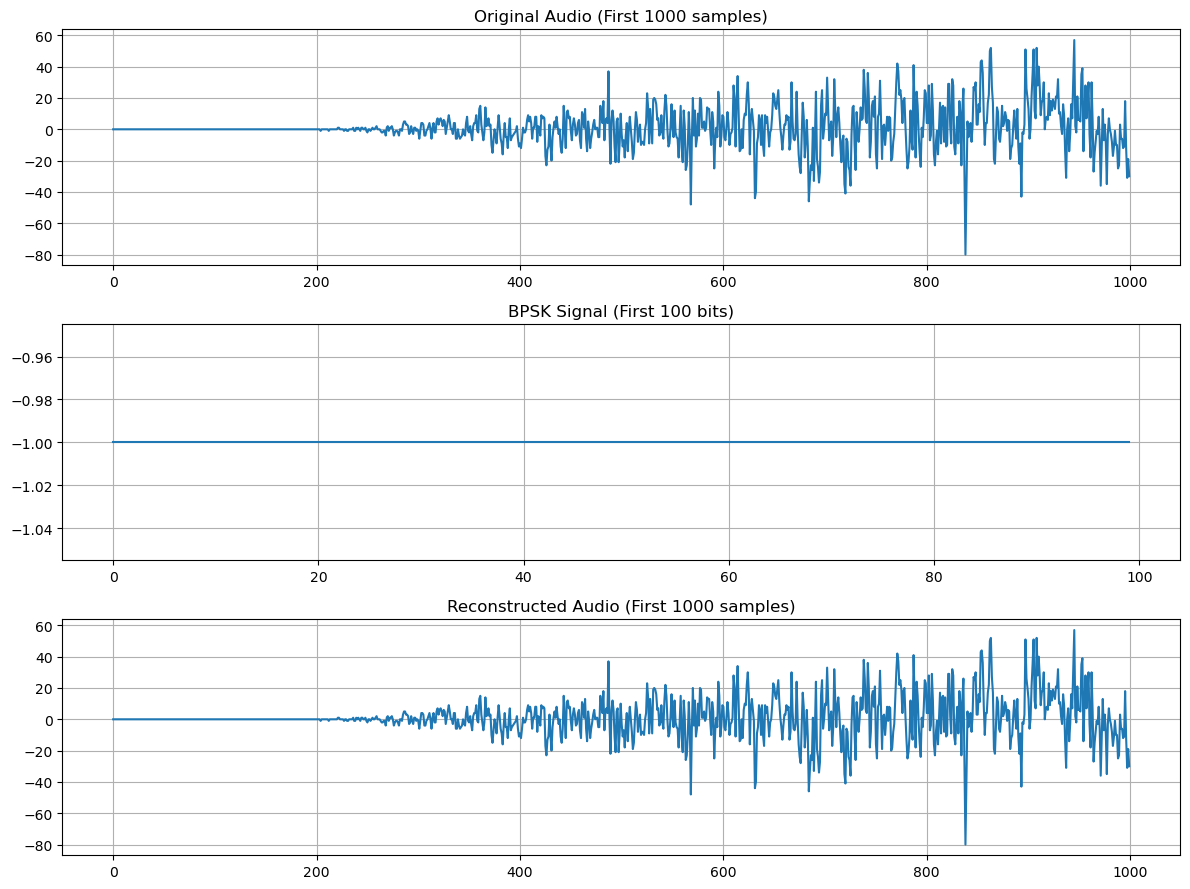

Are the integer arrays equal after reconstruction (with BPSK)? True


In [ ]:


# Step 1: Load audio file
input_file = r'C:\Users\ronit\Desktop\Digital Comunication\jm_beat_hip-hop-rnb-01-106355.wav'
sample_rate, audio = read(input_file)

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Ensure it's 16-bit PCM
audio = audio.astype(np.int16)

# Step 2: Convert audio to bits
bits = np.array([int(bit) for byte in audio.tobytes() for bit in format(byte, '08b')], dtype=np.uint8)

# Step 3: BPSK modulation (0 -> -1, 1 -> +1)
# Ensure bits are integers before modulation
bits_int = bits.astype(np.int32)  # Convert bits to int32 to avoid overflow or unexpected behavior
bpsk_signal = 2 * bits_int - 1  # This will map 0 to -1, and 1 to +1
print("BPSK Signal (first 20 bits):", bpsk_signal[:20])  # Debug: check first 20 bits

# Step 4: Demodulate with thresholding (use -1 and +1 values for demodulation)
threshold = 0.1  # Tolerance for thresholding
received_bits = (bpsk_signal > threshold).astype(np.uint8)  # Thresholding
print("Received Bits (first 20 bits after demodulation):", received_bits[:20])  # Debug: check received bits

# Step 5: Convert bits back to bytes and then to audio
bit_groups = [received_bits[i:i+8] for i in range(0, len(received_bits), 8)]
reconstructed_bytes = bytearray(int(''.join(map(str, group)), 2) for group in bit_groups if len(group) == 8)
reconstructed_audio = np.frombuffer(reconstructed_bytes, dtype=np.int16)

# Ensure lengths match
if len(reconstructed_audio) != len(audio):
    print(f"Length mismatch: Adjusting to match original length.")
    if len(reconstructed_audio) > len(audio):
        reconstructed_audio = reconstructed_audio[:len(audio)]
    else:
        reconstructed_audio = np.pad(reconstructed_audio, (0, len(audio) - len(reconstructed_audio)))

# Step 6: Plot to compare original, modulated, and reconstructed audio
plt.figure(figsize=(12, 9))

# Plot Original Audio
plt.subplot(3, 1, 1)
plt.title("Original Audio (First 1000 samples)")
plt.plot(audio[:1000])
plt.grid(True)

# Plot BPSK Signal
plt.subplot(3, 1, 2)
plt.title("BPSK Signal (First 100 bits)")
plt.plot(bpsk_signal[:100])
plt.grid(True)

# Plot Reconstructed Audio
plt.subplot(3, 1, 3)
plt.title("Reconstructed Audio (First 1000 samples)")
plt.plot(reconstructed_audio[:1000])
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 7: Check if integer arrays are equal
are_equal_int = np.array_equal(audio, reconstructed_audio)
print("Are the integer arrays equal after reconstruction (with BPSK)?", are_equal_int)


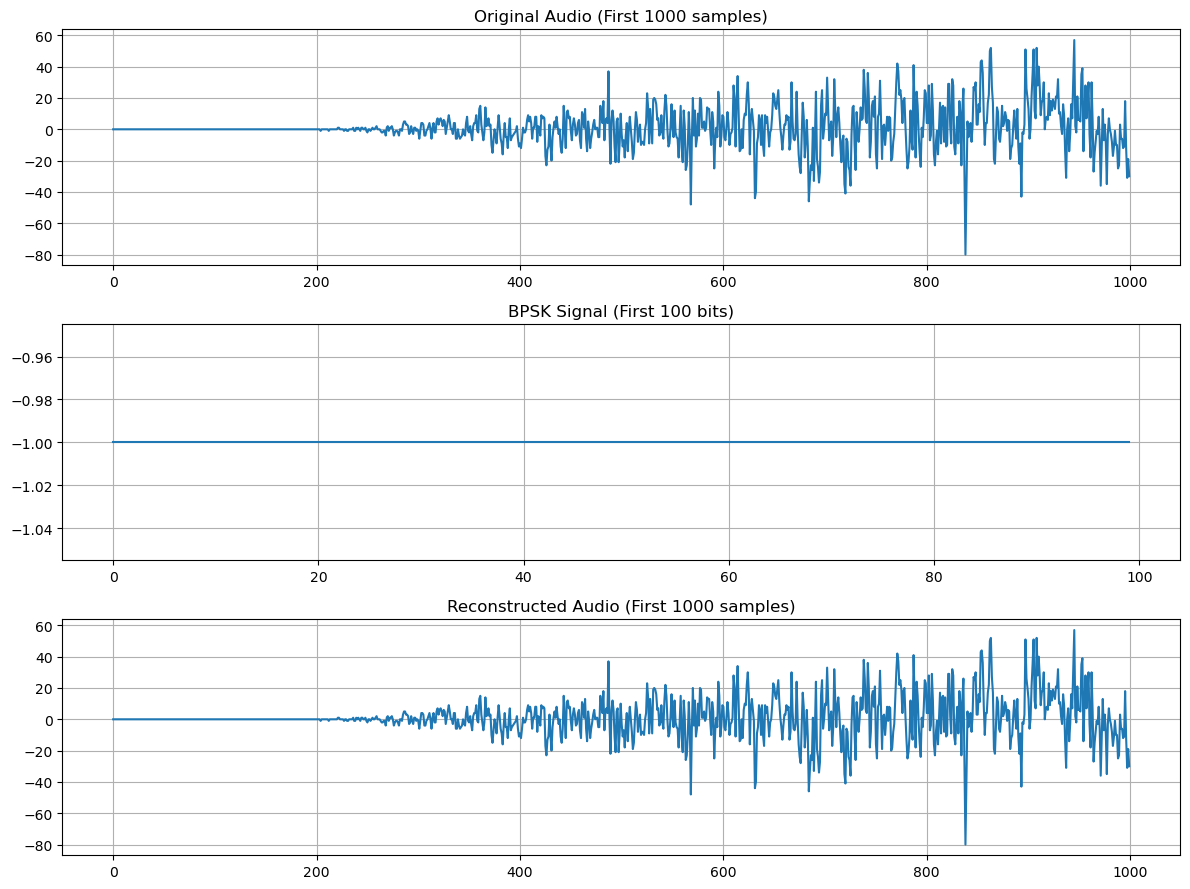

Are the integer arrays equal after reconstruction (with BPSK)? True


In [ ]:


# Step 1: Load audio file
input_file = r'C:\Users\ronit\Desktop\Digital Comunication\jm_beat_hip-hop-rnb-01-106355.wav'
sample_rate, audio = read(input_file)

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Ensure it's 16-bit PCM
audio = audio.astype(np.int16)

# Step 2: Convert audio to bits
bits = np.array([int(bit) for byte in audio.tobytes() for bit in format(byte, '08b')], dtype=np.uint8)

# Step 3: BPSK modulation (0 -> -1, 1 -> +1)
# Ensure bits are integers before modulation
bits_int = bits.astype(np.int32)  # Convert bits to int32 to avoid overflow or unexpected behavior
bpsk_signal = 2 * bits_int - 1  # This will map 0 to -1, and 1 to +1

# Step 4: Demodulate with direct mapping (-1 -> 0, 1 -> 1)
received_bits = (bpsk_signal == 1).astype(np.uint8)  # Directly map 1 to 1, -1 to 0

# Step 5: Convert bits back to bytes and then to audio
bit_groups = [received_bits[i:i+8] for i in range(0, len(received_bits), 8)]
reconstructed_bytes = bytearray(int(''.join(map(str, group)), 2) for group in bit_groups if len(group) == 8)
reconstructed_audio = np.frombuffer(reconstructed_bytes, dtype=np.int16)

# Ensure lengths match
if len(reconstructed_audio) != len(audio):
    print(f"Length mismatch: Adjusting to match original length.")
    if len(reconstructed_audio) > len(audio):
        reconstructed_audio = reconstructed_audio[:len(audio)]
    else:
        reconstructed_audio = np.pad(reconstructed_audio, (0, len(audio) - len(reconstructed_audio)))

# Step 6: Plot to compare original, modulated, and reconstructed audio
plt.figure(figsize=(12, 9))

# Plot Original Audio
plt.subplot(3, 1, 1)
plt.title("Original Audio (First 1000 samples)")
plt.plot(audio[:1000])
plt.grid(True)

# Plot BPSK Signal
plt.subplot(3, 1, 2)
plt.title("BPSK Signal (First 100 bits)")
plt.plot(bpsk_signal[:100])
plt.grid(True)

# Plot Reconstructed Audio
plt.subplot(3, 1, 3)
plt.title("Reconstructed Audio (First 1000 samples)")
plt.plot(reconstructed_audio[:1000])
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 7: Check if integer arrays are equal
are_equal_int = np.array_equal(audio, reconstructed_audio)
print("Are the integer arrays equal after reconstruction (with BPSK)?", are_equal_int)


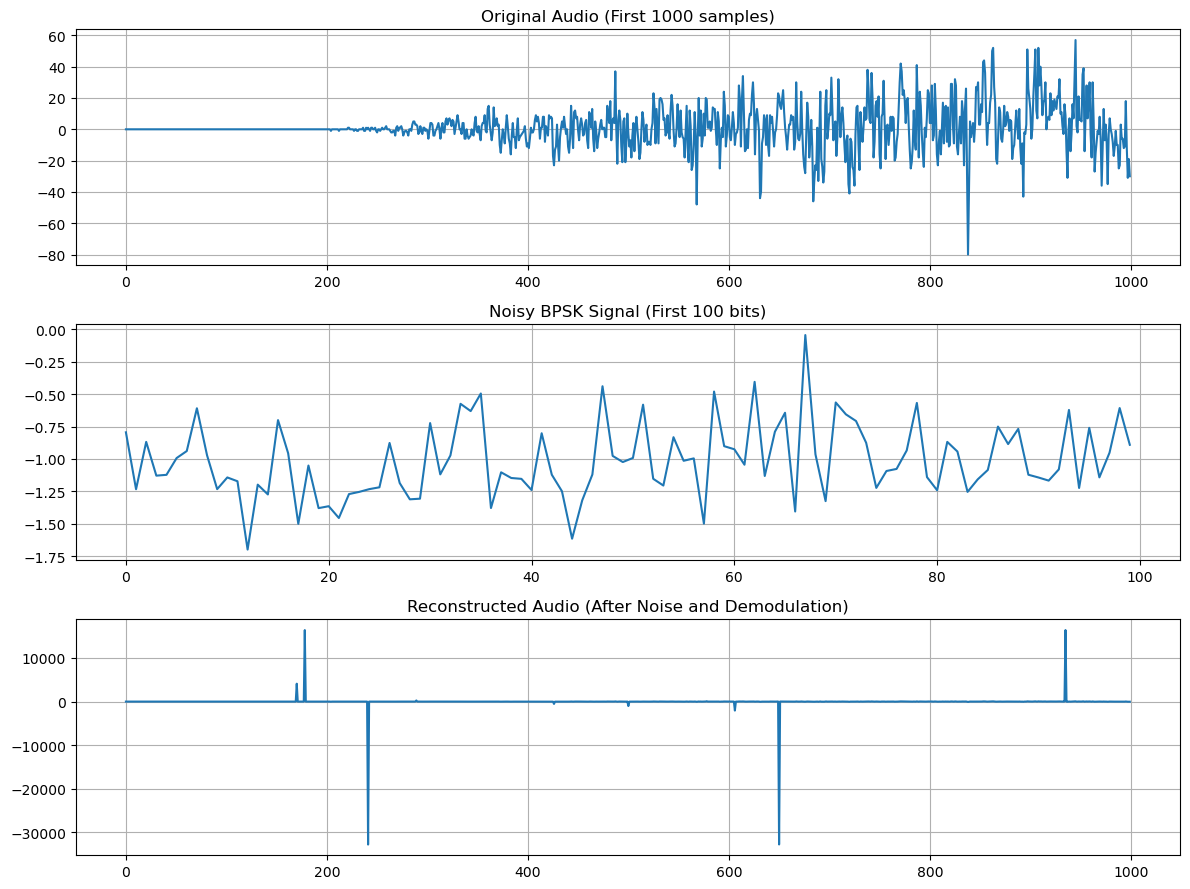

Are the integer arrays equal after reconstruction (with noise and BPSK)? False


In [ ]:


# Step 1: Load audio file
input_file = r'C:\Users\ronit\Desktop\Digital Comunication\jm_beat_hip-hop-rnb-01-106355.wav'
sample_rate, audio = read(input_file)

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Ensure it's 16-bit PCM
audio = audio.astype(np.int16)

# Step 2: Convert audio to bits
bits = np.array([int(bit) for byte in audio.tobytes() for bit in format(byte, '08b')], dtype=np.uint8)

# Step 3: BPSK modulation (0 -> -1, 1 -> +1)
bits_int = bits.astype(np.int32)  # Convert bits to int32 to avoid overflow or unexpected behavior
bpsk_signal = 2 * bits_int - 1  # This will map 0 to -1, and 1 to +1

# Step 4: Add Gaussian noise to the BPSK signal (AWGN)
SNR_dB = 10  # Signal-to-Noise Ratio in dB
SNR = 10**(SNR_dB / 10)  # Convert SNR to linear scale
signal_power = np.mean(bpsk_signal**2)
noise_power = signal_power / SNR
noise = np.random.normal(0, np.sqrt(noise_power), bpsk_signal.shape)
noisy_bpsk_signal = bpsk_signal + noise

# Step 5: Demodulate the noisy BPSK signal (with thresholding)
received_bits = (noisy_bpsk_signal >= 0).astype(np.uint8)  # Map values >= 0 to 1, and < 0 to 0

# Step 6: Convert bits back to bytes and then to audio
bit_groups = [received_bits[i:i+8] for i in range(0, len(received_bits), 8)]
reconstructed_bytes = bytearray(int(''.join(map(str, group)), 2) for group in bit_groups if len(group) == 8)
reconstructed_audio = np.frombuffer(reconstructed_bytes, dtype=np.int16)

# Ensure lengths match
if len(reconstructed_audio) != len(audio):
    print(f"Length mismatch: Adjusting to match original length.")
    if len(reconstructed_audio) > len(audio):
        reconstructed_audio = reconstructed_audio[:len(audio)]
    else:
        reconstructed_audio = np.pad(reconstructed_audio, (0, len(audio) - len(reconstructed_audio)))

# Step 7: Plot to compare original, noisy, and reconstructed audio
plt.figure(figsize=(12, 9))

# Plot Original Audio
plt.subplot(3, 1, 1)
plt.title("Original Audio (First 1000 samples)")
plt.plot(audio[:1000])
plt.grid(True)

# Plot Noisy BPSK Signal
plt.subplot(3, 1, 2)
plt.title("Noisy BPSK Signal (First 100 bits)")
plt.plot(noisy_bpsk_signal[:100])
plt.grid(True)

# Plot Reconstructed Audio
plt.subplot(3, 1, 3)
plt.title("Reconstructed Audio (After Noise and Demodulation)")
plt.plot(reconstructed_audio[:1000])
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 8: Check if integer arrays are equal
are_equal_int = np.array_equal(audio, reconstructed_audio)
print("Are the integer arrays equal after reconstruction (with noise and BPSK)?", are_equal_int)


In [ ]:
# Calculate Bit Error Rate (BER)
bit_errors = np.sum(bits != received_bits)
ber = bit_errors / len(bits)
print(f"Bit Error Rate (BER): {ber}")


Bit Error Rate (BER): 0.0007789979690775681


Encoded Bits: [1 0 1 1 0 1 0]
BPSK Signal: [  1 255   1   1 255   1 255]
Demodulated Bits: [1 1 1 1 1 1 1]
Decoded Bits: [1 1 1 1]
Original Bits: [1 0 1 0]
Decoded Bits: [1 1 1 1]
Are the bits equal? False


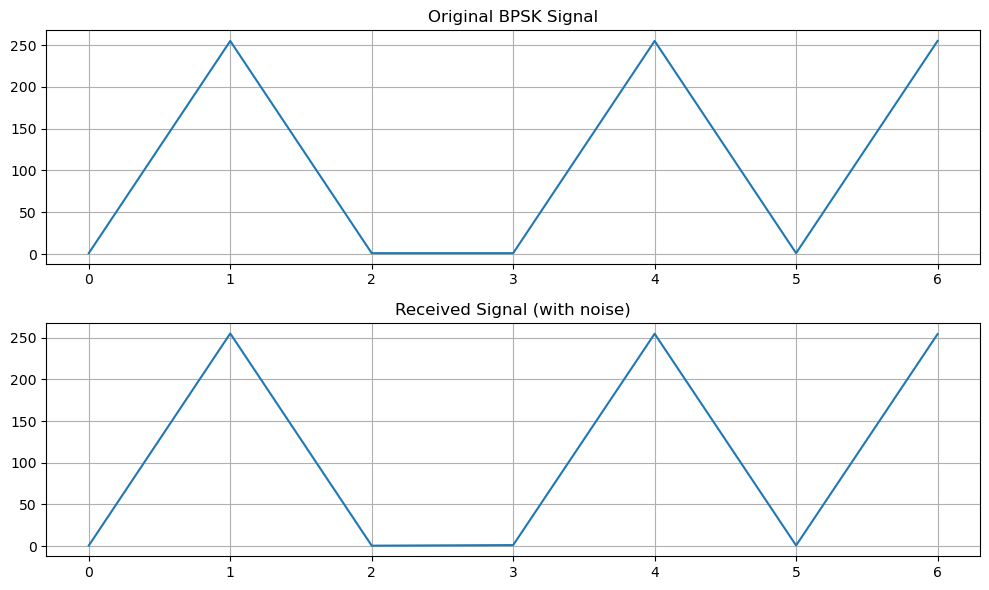

In [ ]:


# Hamming(7,4) Encoder: Adds parity bits to data bits
def hamming_encode(data_bits):
    # Create the Hamming(7,4) code: (4 data bits + 3 parity bits)
    # Parity bit positions: 1, 2, 4 (1-based indexing)
    
    # Initialize the 7-bit Hamming code
    code = np.zeros(7, dtype=np.uint8)
    
    # Data bits (positions 3, 5, 6, 7 in the Hamming code)
    code[2] = data_bits[0]
    code[4] = data_bits[1]
    code[5] = data_bits[2]
    code[6] = data_bits[3]
    
    # Parity bits (calculated based on the data bits)
    # Parity bit at position 1
    code[0] = data_bits[0] ^ data_bits[1] ^ data_bits[3]
    
    # Parity bit at position 2
    code[1] = data_bits[0] ^ data_bits[2] ^ data_bits[3]
    
    # Parity bit at position 4
    code[3] = data_bits[1] ^ data_bits[2] ^ data_bits[3]
    
    return code

# Hamming(7,4) Decoder: Detects and corrects single-bit errors
def hamming_decode(code):
    # Check parity bits for errors
    parity_check = np.zeros(3, dtype=np.uint8)
    
    # Check parity bit 1
    parity_check[0] = code[0] ^ code[2] ^ code[4] ^ code[6]
    
    # Check parity bit 2
    parity_check[1] = code[1] ^ code[2] ^ code[5] ^ code[6]
    
    # Check parity bit 4
    parity_check[2] = code[3] ^ code[4] ^ code[5] ^ code[6]
    
    # If there is an error, the result of the XOR will indicate the bit to flip
    error_position = parity_check[0] * 1 + parity_check[1] * 2 + parity_check[2] * 4
    
    # If error_position is non-zero, there is an error at that position
    if error_position != 0:
        print(f"Error detected at position {error_position}")
        # Correct the error
        code[error_position - 1] ^= 1
    
    # Return the decoded data bits (positions 3, 5, 6, 7)
    return np.array([code[2], code[4], code[5], code[6]], dtype=np.uint8)

# BPSK modulation
def bpsk_modulate(bits):
    return 2 * bits - 1

# BPSK demodulation
def bpsk_demodulate(bpsk_signal):
    return (bpsk_signal > 0).astype(np.uint8)

# Main Process
# Step 1: Generate some data bits
data_bits = np.array([1, 0, 1, 0], dtype=np.uint8)  # Example 4-bit data

# Step 2: Encode the data using Hamming code
encoded_bits = hamming_encode(data_bits)
print(f"Encoded Bits: {encoded_bits}")

# Step 3: Modulate the encoded bits using BPSK
bpsk_signal = bpsk_modulate(encoded_bits)
print(f"BPSK Signal: {bpsk_signal}")

# Step 4: Simulate transmission with noise
noise = np.random.normal(0, 0.5, bpsk_signal.shape)  # Add Gaussian noise
received_signal = bpsk_signal + noise

# Step 5: Demodulate the received signal
demodulated_bits = bpsk_demodulate(received_signal)
print(f"Demodulated Bits: {demodulated_bits}")

# Step 6: Decode the received bits using Hamming code
decoded_bits = hamming_decode(demodulated_bits)
print(f"Decoded Bits: {decoded_bits}")

# Step 7: Compare the original data with the decoded data
print(f"Original Bits: {data_bits}")
print(f"Decoded Bits: {decoded_bits}")
print(f"Are the bits equal? {np.array_equal(data_bits, decoded_bits)}")

# Plot the BPSK signal and received signal for visualization
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Original BPSK Signal")
plt.plot(bpsk_signal)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title("Received Signal (with noise)")
plt.plot(received_signal)
plt.grid(True)

plt.tight_layout()
plt.show()


Encoded Bits: [1 0 1 1 0 1 0]
BPSK Signal: [  1 255   1   1 255   1 255]


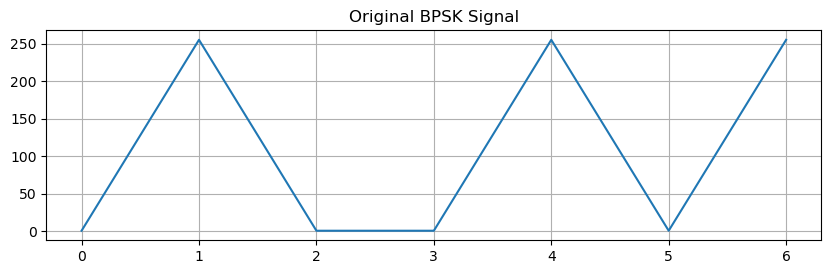

In [ ]:

# Hamming(7,4) Encoder: Adds parity bits to data bits
def hamming_encode(data_bits):
    # Create the Hamming(7,4) code: (4 data bits + 3 parity bits)
    # Parity bit positions: 1, 2, 4 (1-based indexing)
    
    # Initialize the 7-bit Hamming code
    code = np.zeros(7, dtype=np.uint8)
    
    # Data bits (positions 3, 5, 6, 7 in the Hamming code)
    code[2] = data_bits[0]
    code[4] = data_bits[1]
    code[5] = data_bits[2]
    code[6] = data_bits[3]
    
    # Parity bits (calculated based on the data bits)
    # Parity bit at position 1
    code[0] = data_bits[0] ^ data_bits[1] ^ data_bits[3]
    
    # Parity bit at position 2
    code[1] = data_bits[0] ^ data_bits[2] ^ data_bits[3]
    
    # Parity bit at position 4
    code[3] = data_bits[1] ^ data_bits[2] ^ data_bits[3]
    
    return code

# Hamming(7,4) Decoder: Detects and corrects single-bit errors
def hamming_decode(code):
    # Check parity bits for errors
    parity_check = np.zeros(3, dtype=np.uint8)
    
    # Check parity bit 1
    parity_check[0] = code[0] ^ code[2] ^ code[4] ^ code[6]
    
    # Check parity bit 2
    parity_check[1] = code[1] ^ code[2] ^ code[5] ^ code[6]
    
    # Check parity bit 4
    parity_check[2] = code[3] ^ code[4] ^ code[5] ^ code[6]
    
    # If there is an error, the result of the XOR will indicate the bit to flip
    error_position = parity_check[0] * 1 + parity_check[1] * 2 + parity_check[2] * 4
    
    # If error_position is non-zero, there is an error at that position
    if error_position != 0:
        print(f"Error detected at position {error_position}")
        # Correct the error
        code[error_position - 1] ^= 1
    
    # Return the decoded data bits (positions 3, 5, 6, 7)
    return np.array([code[2], code[4], code[5], code[6]], dtype=np.uint8)

# BPSK modulation
def bpsk_modulate(bits):
    return 2 * bits - 1

# BPSK demodulation
def bpsk_demodulate(bpsk_signal):
    return (bpsk_signal > 0).astype(np.uint8)

# Main Process
# Step 1: Generate some data bits
data_bits = np.array([1, 0, 1, 0], dtype=np.uint8)  # Example 4-bit data

# Step 2: Encode the data using Hamming code
encoded_bits = hamming_encode(data_bits)
print(f"Encoded Bits: {encoded_bits}")

# Step 3: Modulate the encoded bits using BPSK
bpsk_signal = bpsk_modulate(encoded_bits)
print(f"BPSK Signal: {bpsk_signal}")

# Step 4: Simulate transmission with noise
noise = np.random.normal(0, 0.5, bpsk_signal.shape)  # Add Gaussian noise
received_signal = bpsk_signal + noise

# Visualize the noisy signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.title("Original BPSK Signal")
plt.plot(bpsk_signal)
plt.grid(True)


Original Data Bits: [1 0 1 0]
Encoded Bits: [1 0 1 0 1 0 0]
BPSK Signal: [ 1 -1  1 -1  1 -1 -1]
Noisy BPSK Signal: [ 0.33469242 -0.38704899  0.60874012 -0.66632302  1.14592184  0.22874875
 -0.06523244]
Demodulated Bits: [1 0 1 0 1 1 0]
Bit Error Rate (BER): 0.14285714285714285


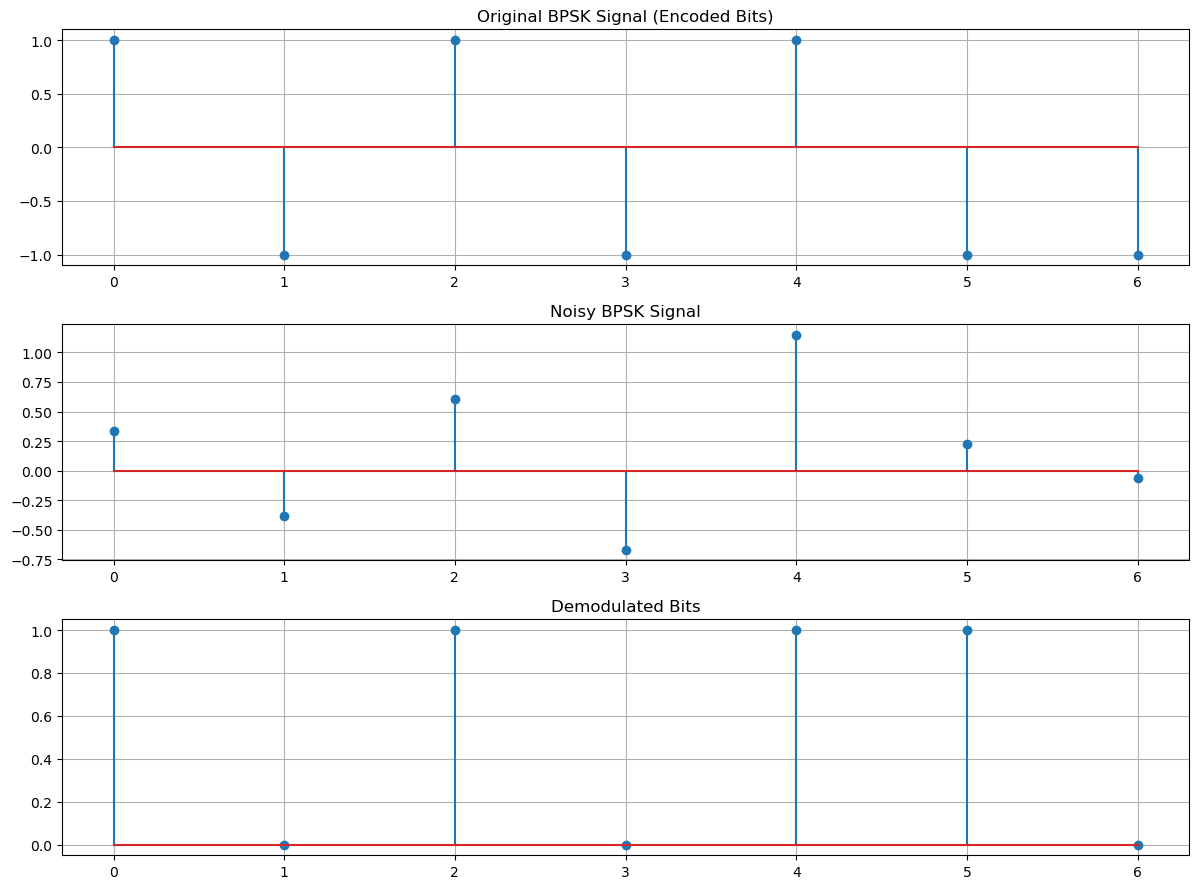

In [ ]:


# Hamming(7,4) Encoder
def hamming_encode(bits):
    # Define the correct Hamming(7,4) generator matrix
    G = np.array([[1, 0, 0, 0, 1, 1, 1],  # first row
                  [0, 1, 0, 0, 1, 0, 1],  # second row
                  [0, 0, 1, 0, 0, 1, 1],  # third row
                  [0, 0, 0, 1, 1, 1, 0]])  # fourth row
    
    # Ensure bits are reshaped into a 2D array (1,4)
    bits_reshaped = bits.reshape(1, -1)
    encoded_bits = np.dot(bits_reshaped, G) % 2
    return encoded_bits.astype(int).flatten()  # Flatten to 1D array

# BPSK Modulation (0 -> -1, 1 -> +1)
def bpsk_modulate(bits):
    return 2 * bits - 1  # Convert 0 to -1, 1 to +1

# BPSK Demodulation (with a simple threshold of 0)
def bpsk_demodulate(bpsk_signal):
    return (bpsk_signal > 0).astype(int)  # 1 for positive, 0 for negative

# Add noise to BPSK signal (Simulate channel noise)
def add_noise(signal, noise_level=0.5):
    noise = np.random.normal(0, noise_level, signal.shape)
    return signal + noise

# Bit Error Rate (BER) Calculation
def calculate_ber(original_bits, received_bits):
    errors = np.sum(original_bits != received_bits)
    return errors / len(original_bits)

# Main process
data_bits = np.array([1, 0, 1, 0], dtype=np.uint8)  # Example 4-bit data
print(f"Original Data Bits: {data_bits}")

# Step 1: Encode using Hamming(7,4)
encoded_bits = hamming_encode(data_bits)
print(f"Encoded Bits: {encoded_bits}")

# Step 2: Modulate using BPSK
bpsk_signal = bpsk_modulate(encoded_bits)
print(f"BPSK Signal: {bpsk_signal}")

# Step 3: Add noise to the BPSK signal
noisy_bpsk_signal = add_noise(bpsk_signal, noise_level=0.5)
print(f"Noisy BPSK Signal: {noisy_bpsk_signal}")

# Step 4: Demodulate the noisy BPSK signal
demodulated_bits = bpsk_demodulate(noisy_bpsk_signal)
print(f"Demodulated Bits: {demodulated_bits}")

# Step 5: Calculate Bit Error Rate (BER)
ber = calculate_ber(encoded_bits, demodulated_bits)
print(f"Bit Error Rate (BER): {ber}")

# Step 6: Plot the signals for comparison
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.title("Original BPSK Signal (Encoded Bits)")
plt.stem(bpsk_signal)  # Removed the 'use_line_collection' argument
plt.grid(True)

plt.subplot(3, 1, 2)
plt.title("Noisy BPSK Signal")
plt.stem(noisy_bpsk_signal)  # Removed the 'use_line_collection' argument
plt.grid(True)

plt.subplot(3, 1, 3)
plt.title("Demodulated Bits")
plt.stem(demodulated_bits)  # Removed the 'use_line_collection' argument
plt.grid(True)

plt.tight_layout()
plt.show()

